In [1]:
from xtck_hybrid import *
import matplotlib.pyplot as plt

## NaK2K Sites K+ Occupancy

In [65]:
def plot_occ_line(x_axis, confidence_dict, k):
    val    = np.array(confidence_dict[k][0])
    lower  = np.array(confidence_dict[k][1])
    higher = np.array(confidence_dict[k][2])
    lower  = val-lower
    higher = higher-val
    plt.errorbar(x_axis, val, yerr = [lower, higher], label=k[:2])
    

In [66]:
file_list = ["../test/01-NaK2K-charge/%d/k_hybrid.out"%i for i in range(36)]

HREX = HREX_result_hybrid(file_list, start=2000, end=10000.1) # drop the first 2 ns
confidence_dict_10 = HREX.get_occupancy_bootstrap_frame(n_resamples=300, method="basic")

HREX = HREX_result_hybrid(file_list, start=2000, end=20000.1) # drop the first 2 ns
confidence_dict_20 = HREX.get_occupancy_bootstrap_frame(n_resamples=300, method="basic")

HREX = HREX_result_hybrid(file_list, start=2000, end=40000.1) # drop the first 2 ns
confidence_dict_40 = HREX.get_occupancy_bootstrap_frame(n_resamples=300, method="basic")

confidence_dict_NaK2K = (confidence_dict_10, confidence_dict_20, confidence_dict_40)

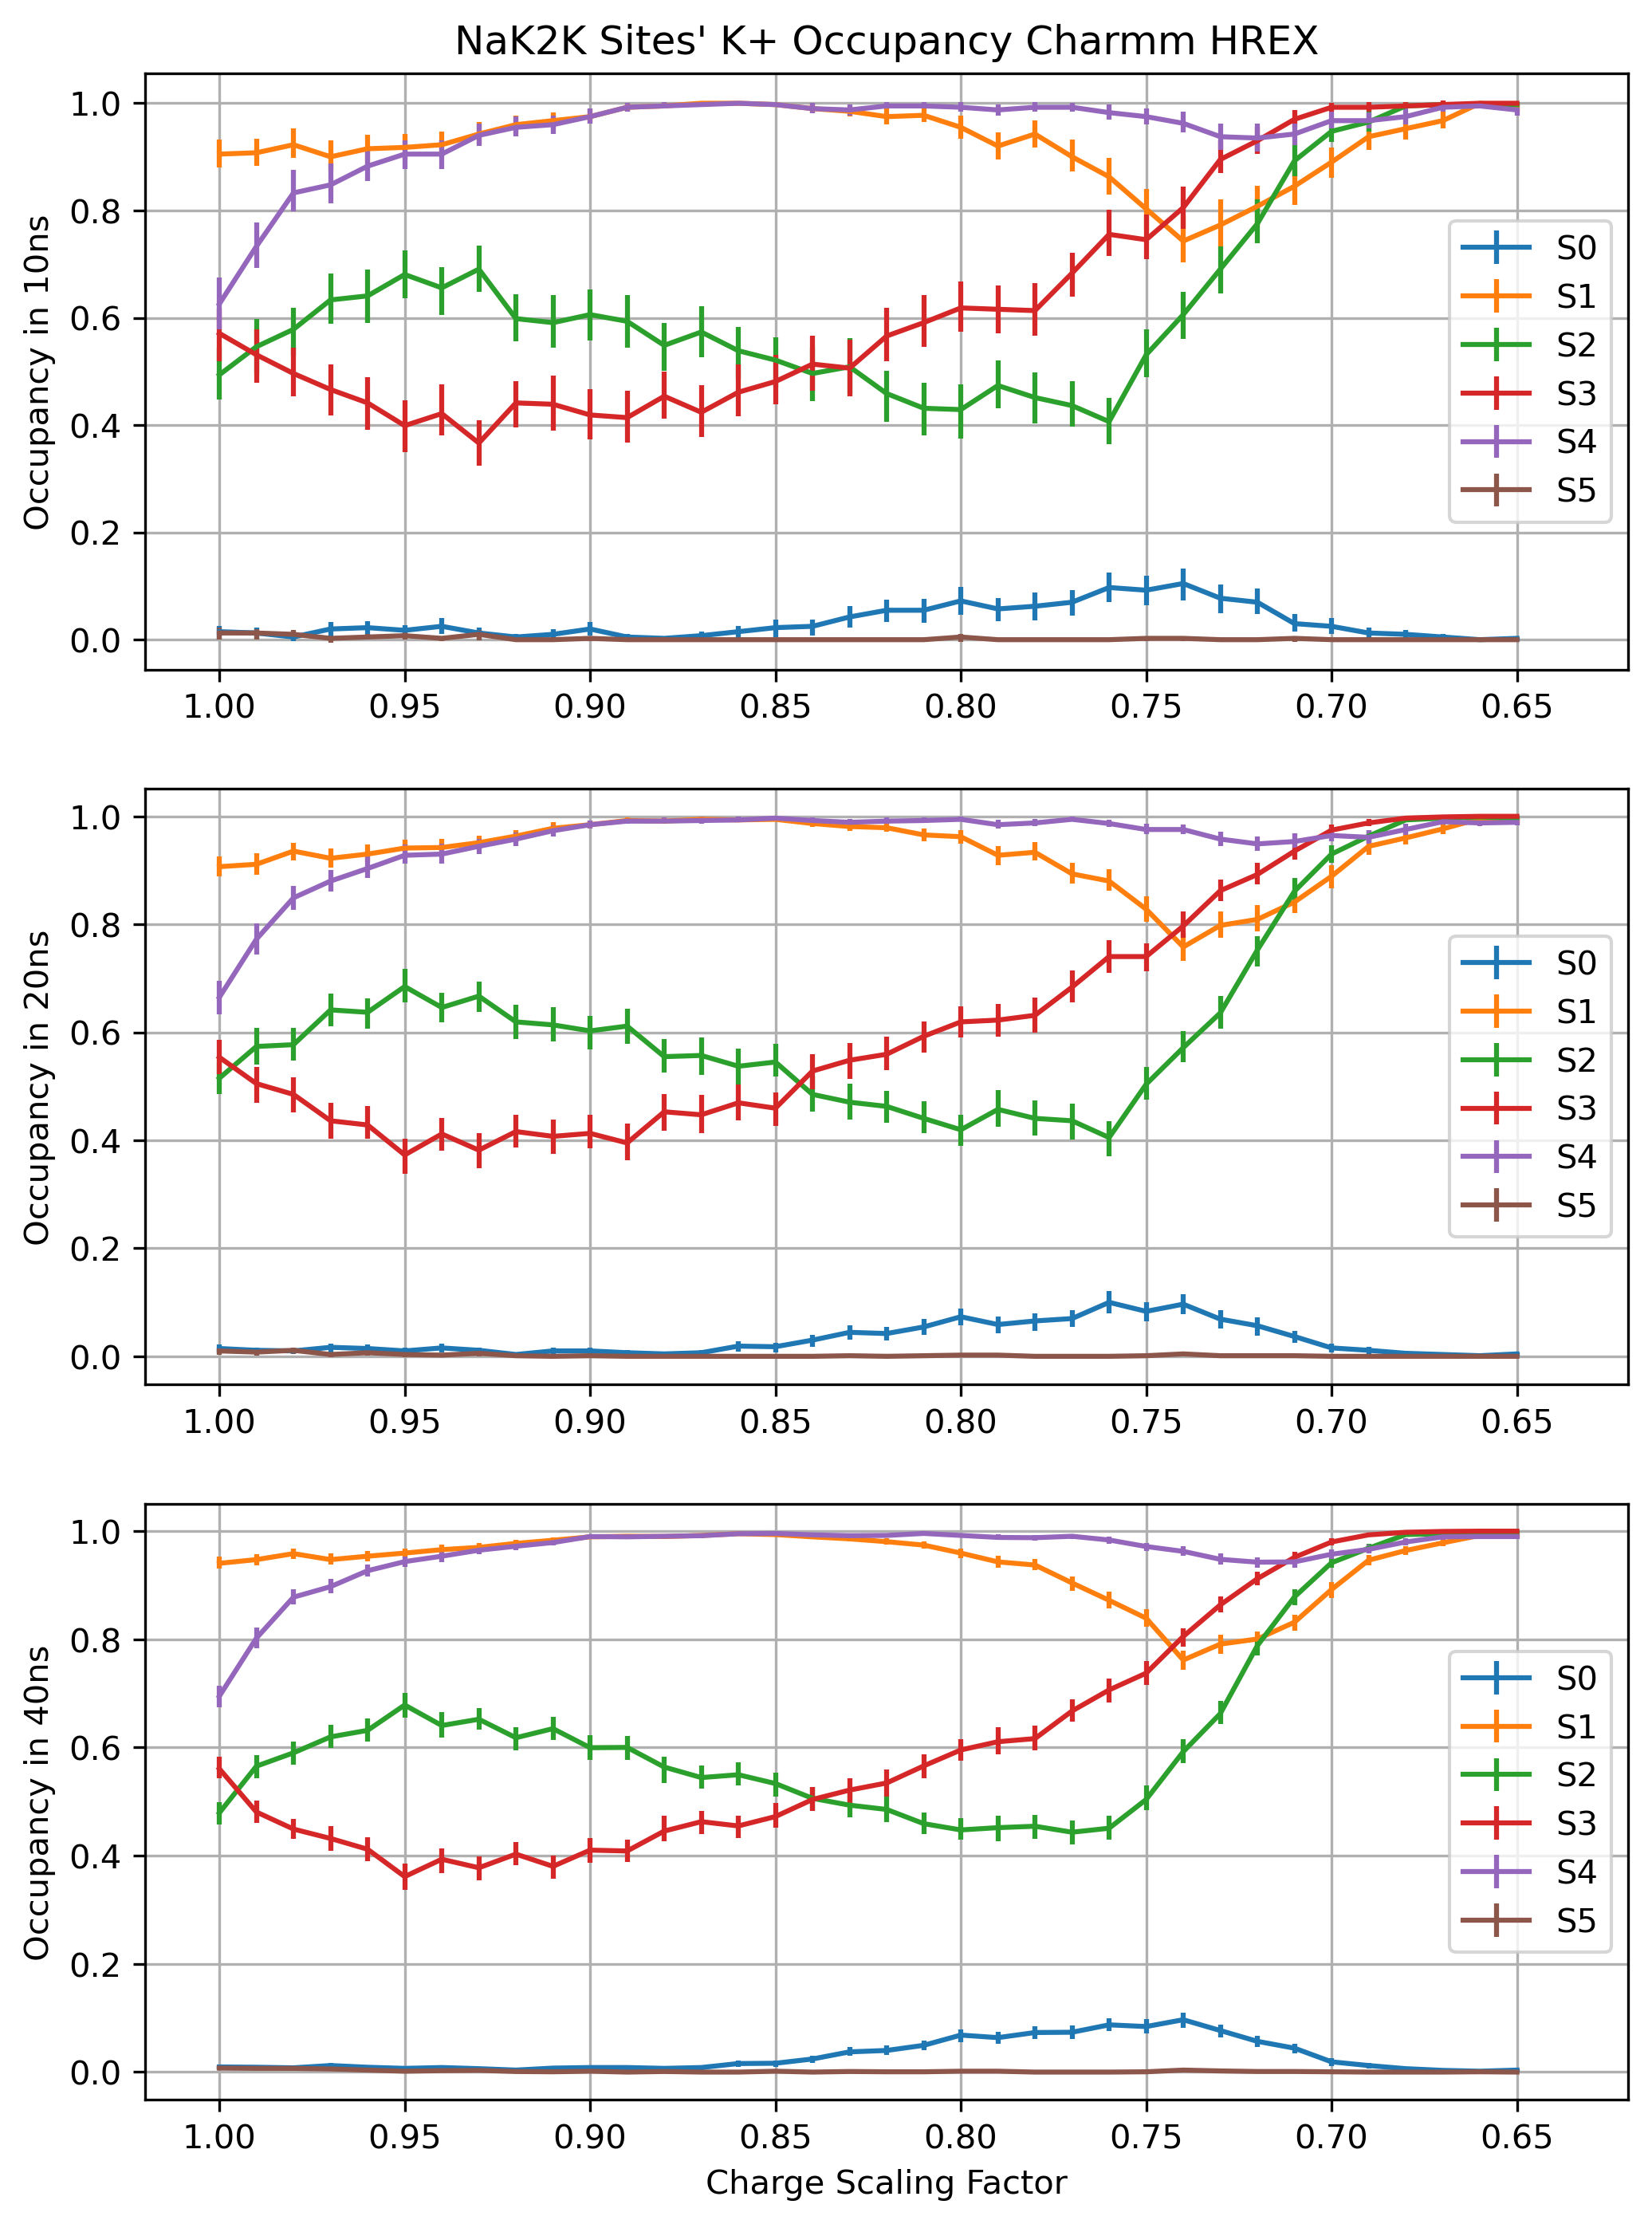

In [67]:
plt.figure(2, dpi=300, figsize=(8,11))
x_axis = np.linspace(1,0.65,36)
(confidence_dict_10, confidence_dict_20, confidence_dict_40)=confidence_dict_NaK2K

plt.subplot(3,1,1)
confidence_dict = confidence_dict_10
for k in ["S0_K", "S1_K", "S2_K", "S3_K", "S4_K", "S5_K"]:
    plot_occ_line(x_axis, confidence_dict, k)
plt.xlim(1.02, 0.62)
plt.title("NaK2K Sites' K+ Occupancy Charmm HREX")
plt.grid()
plt.legend()
plt.ylabel("Occupancy in 10ns")

plt.subplot(3,1,2)
confidence_dict = confidence_dict_20
for k in ["S0_K", "S1_K", "S2_K", "S3_K", "S4_K", "S5_K"]:
    plot_occ_line(x_axis, confidence_dict, k)
plt.xlim(1.02, 0.62)
plt.grid()
plt.legend()
plt.ylabel("Occupancy in 20ns")

plt.subplot(3,1,3)
confidence_dict = confidence_dict_40
for k in ["S0_K", "S1_K", "S2_K", "S3_K", "S4_K", "S5_K"]:
    plot_occ_line(x_axis, confidence_dict, k)
plt.xlim(1.02, 0.62)
plt.grid()
plt.legend()
plt.xlabel("Charge Scaling Factor")
plt.ylabel("Occupancy in 40ns")

plt.savefig("NaK2K_sites_Occupancy.png")

## TRAAK Sites K+ Occupancy

In [68]:
file_list = ["../test/02-TRAAK-charge/%d/k_hybrid.out"%i for i in range(36)]

HREX = HREX_result_hybrid(file_list, start=2000, end=10000.1) # drop the first 2 ns
confidence_dict_10 = HREX.get_occupancy_bootstrap_frame(n_resamples=300, method="basic")

HREX = HREX_result_hybrid(file_list, start=2000, end=20000.1) # drop the first 2 ns
confidence_dict_20 = HREX.get_occupancy_bootstrap_frame(n_resamples=300, method="basic")

HREX = HREX_result_hybrid(file_list, start=2000, end=40000.1) # drop the first 2 ns
confidence_dict_40 = HREX.get_occupancy_bootstrap_frame(n_resamples=300, method="basic")

confidence_dict_TRAAK = (confidence_dict_10, confidence_dict_20, confidence_dict_40)

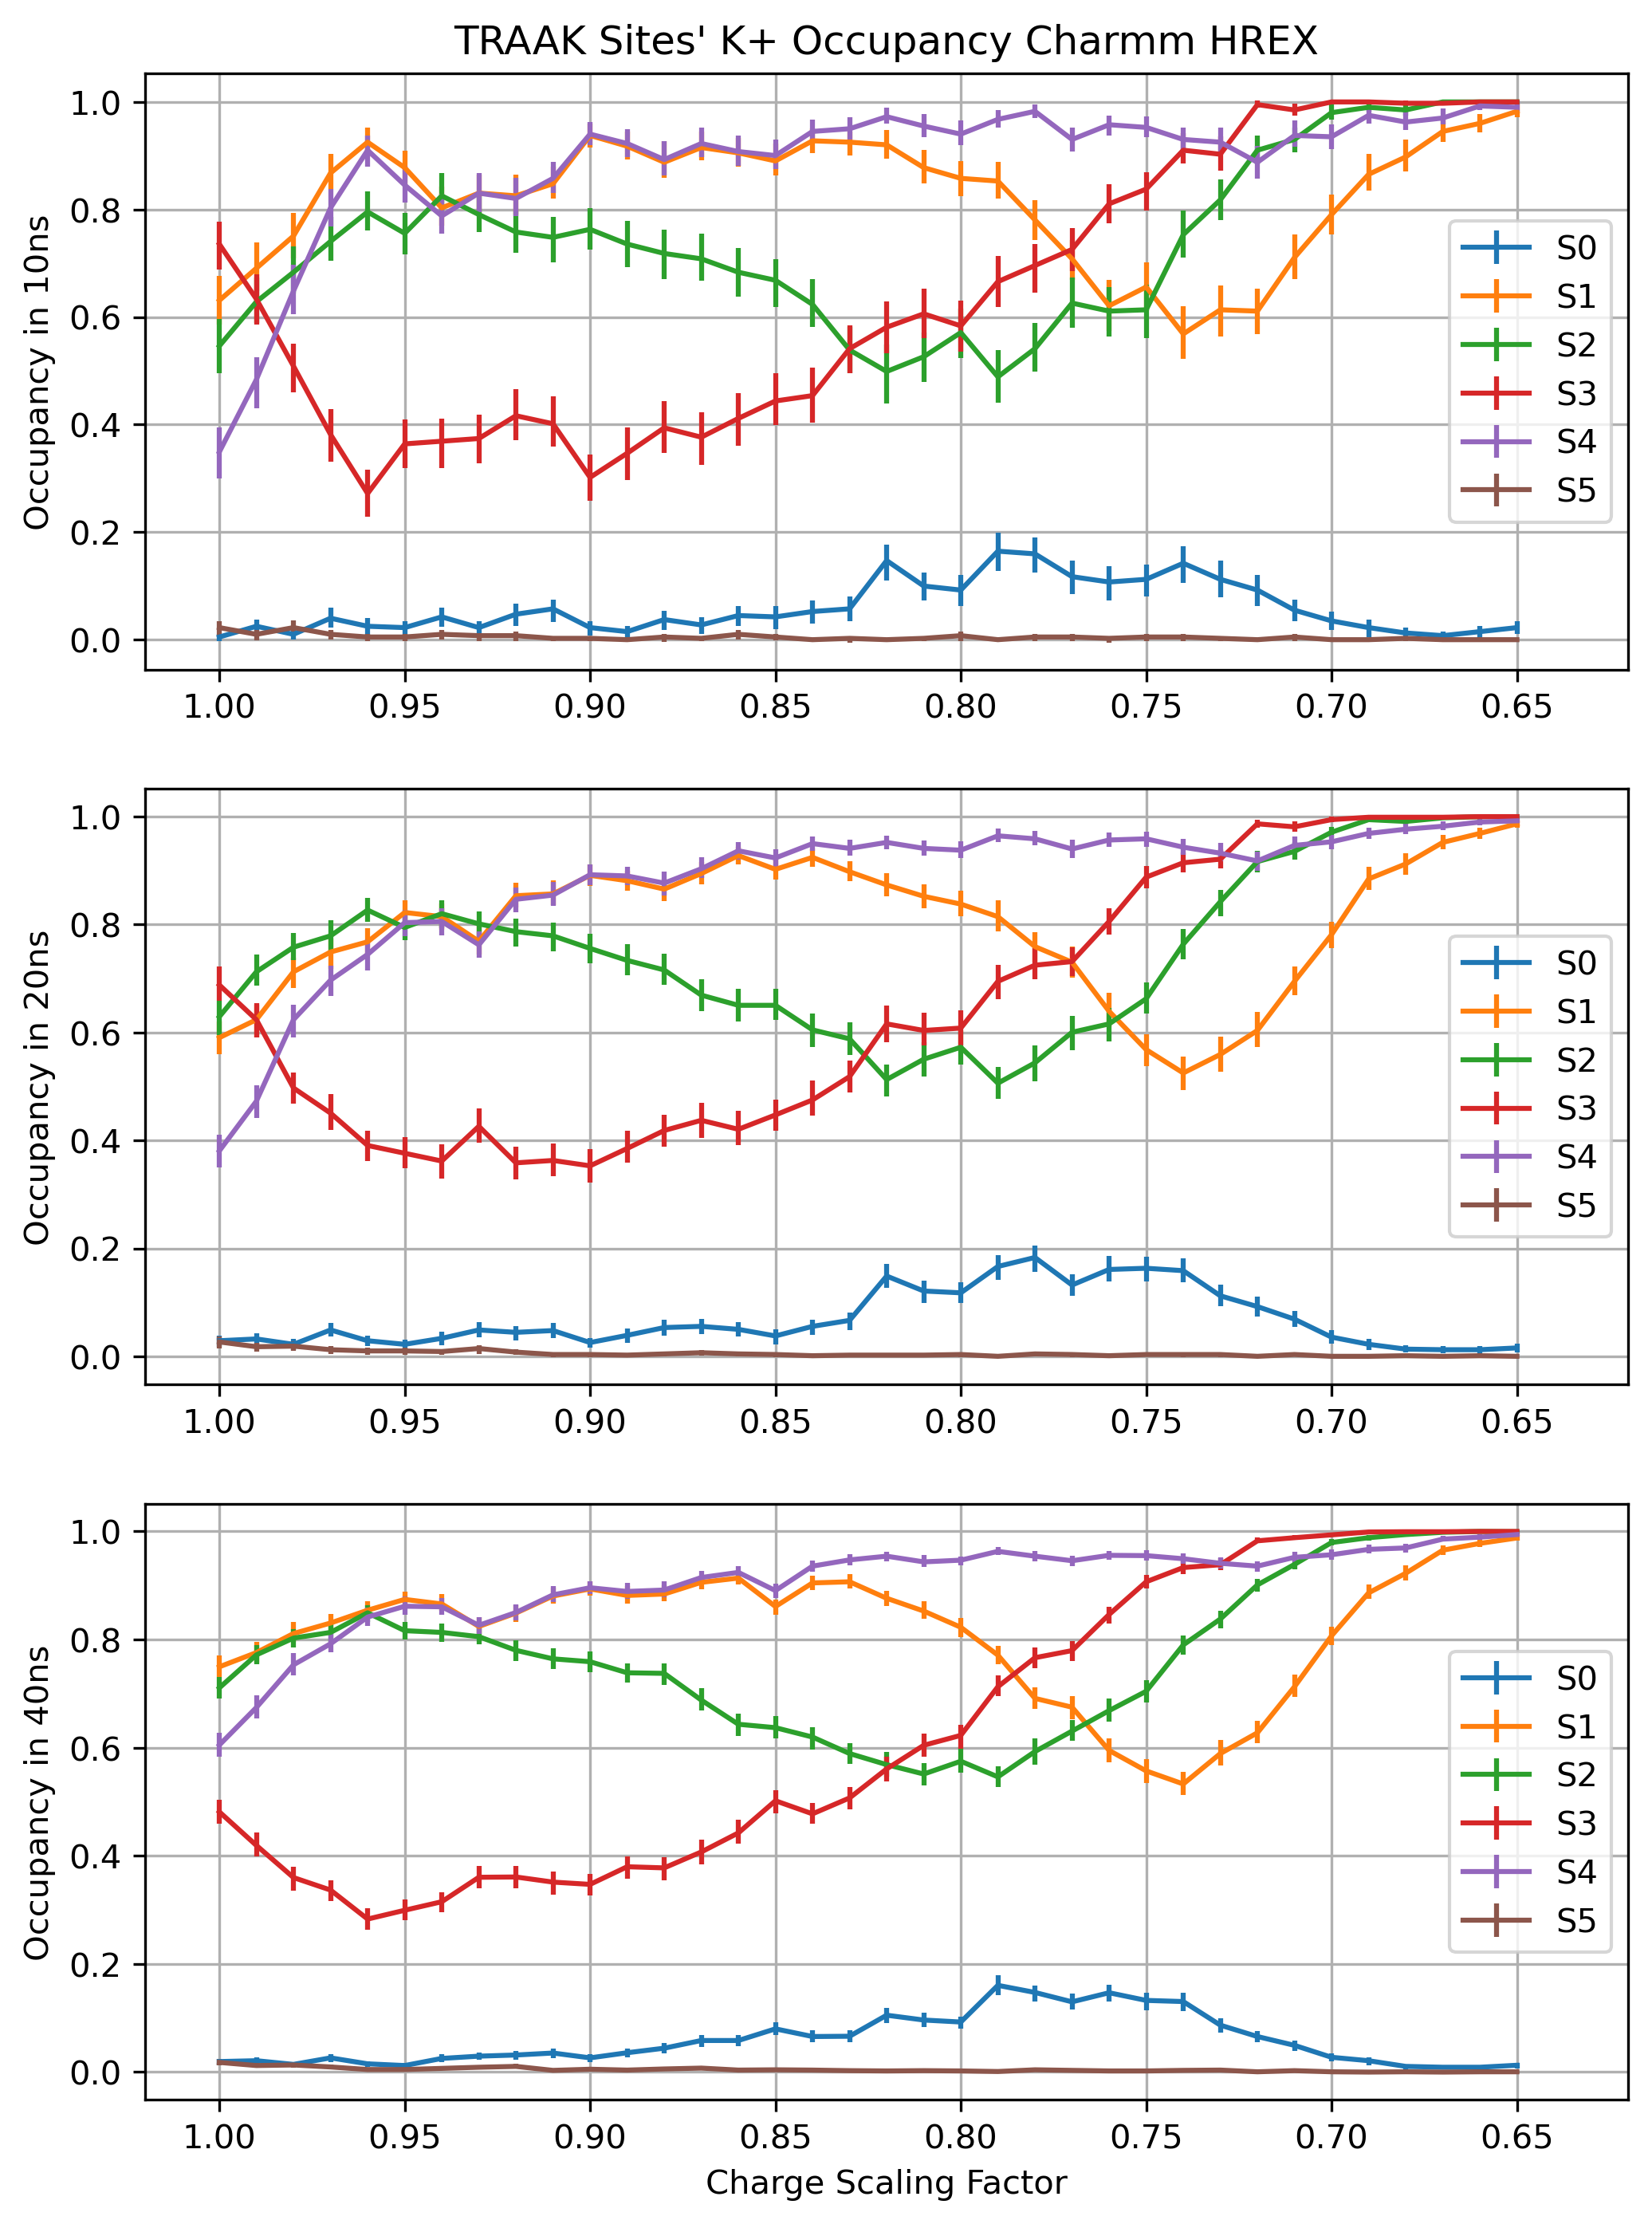

In [69]:
plt.figure(2, dpi=300, figsize=(8,11))
x_axis = np.linspace(1,0.65,36)
(confidence_dict_10, confidence_dict_20, confidence_dict_40) = confidence_dict_TRAAK

plt.subplot(3,1,1)
confidence_dict = confidence_dict_10
for k in ["S0_K", "S1_K", "S2_K", "S3_K", "S4_K", "S5_K"]:
    plot_occ_line(x_axis, confidence_dict, k)
plt.xlim(1.02, 0.62)
plt.title("TRAAK Sites' K+ Occupancy Charmm HREX")
plt.grid()
plt.legend()
plt.ylabel("Occupancy in 10ns")

plt.subplot(3,1,2)
confidence_dict = confidence_dict_20
for k in ["S0_K", "S1_K", "S2_K", "S3_K", "S4_K", "S5_K"]:
    plot_occ_line(x_axis, confidence_dict, k)
plt.xlim(1.02, 0.62)
plt.grid()
plt.legend()
plt.ylabel("Occupancy in 20ns")

plt.subplot(3,1,3)
confidence_dict = confidence_dict_40
for k in ["S0_K", "S1_K", "S2_K", "S3_K", "S4_K", "S5_K"]:
    plot_occ_line(x_axis, confidence_dict, k)
plt.xlim(1.02, 0.62)
plt.grid()
plt.legend()
plt.xlabel("Charge Scaling Factor")
plt.ylabel("Occupancy in 40ns")

plt.savefig("TRAAK_sites_Occupancy.png")

# SF states Occurrence

In [62]:
prop_cycle = plt.rcParams['axes.prop_cycle']
s_list_3 = ["KKKK", "K0KK", "KK0K", "0KKK", "KKK0", "KKKW",]
s_list_2 = ["0K0K", "K0K0", "0KK0", "WKK0", "W0K0"]
state_color = {s_list[i]:(list(prop_cycle)*2)[i]["color"] for i in range(len(s_list))}

state_color_line = {}
c_list = list(prop_cycle)
for i in range(len(s_list_3)):
    state = s_list_3[i]
    c = c_list[i]['color']
    state_color_line[state] = (c,"-")
for i in range(len(s_list_2)):
    state = s_list_2[i]
    c = c_list[i]['color']
    state_color_line[state] = (c,":")

def plot_a_state(x_axis, state, states_result_dict, state_color_line):
    x_index = states_result_dict[state]["index"]
    x_val = np.array(x_axis[x_index])
    y_val = np.array(states_result_dict[state]["occurrence"])
    y_low = np.array(states_result_dict[state]["lower"])
    y_low = y_val - y_low
    y_up  = np.array(states_result_dict[state]["upper"])
    y_up  = y_up - y_val
    if state in state_color:
        c = state_color_line[state][0]
        l_style = state_color_line[state][1]
    else:
        c = "black"
        l_style="-"
    plt.errorbar(x_val, y_val, yerr = [y_low, y_up], label=state, c=c, linestyle=l_style)

def plot_state_HREX(x_axis, states_result_dict, state_color_line):
    for state in states_result_dict:
        if state.count("K") >= 3:
            if np.any(np.array(states_result_dict[state]["occurrence"])>0.02):
                plot_a_state(x_axis, state, states_result_dict, state_color_line)
    for state in states_result_dict:
        if state.count("K") < 3:
            if np.any(np.array(states_result_dict[state]["occurrence"])>0.02):
                plot_a_state(x_axis, state, states_result_dict, state_color_line)
    plt.xlim(1.02, 0.62)
    plt.legend()
    plt.grid()

In [43]:
state_color_line

{'KKKK': ('#1f77b4', '-'),
 'K0KK': ('#ff7f0e', '-'),
 'KK0K': ('#2ca02c', '-'),
 '0KKK': ('#d62728', '-'),
 'KKK0': ('#9467bd', '-'),
 'KKKW': ('#8c564b', '-'),
 '0K0K': ('#1f77b4', ':'),
 'K0K0': ('#ff7f0e', ':'),
 '0KK0': ('#2ca02c', ':'),
 'WKK0': ('#d62728', ':'),
 'W0K0': ('#9467bd', ':')}

## NaK2K SF states Occurrence

In [10]:
file_list = ["../test/01-NaK2K-charge/%d/k_hybrid.out"%i for i in range(36)]

HREX = HREX_result_hybrid(file_list, start=2000, end=10000) # drop 2ns
states_result_dict_10 = HREX.get_state_distribution_bootstrap_frame(4)

HREX = HREX_result_hybrid(file_list, start=2000, end=20000) # drop 2ns
states_result_dict_20 = HREX.get_state_distribution_bootstrap_frame(4)

HREX = HREX_result_hybrid(file_list, start=2000, end=40000.1) # drop 2ns
states_result_dict_40 = HREX.get_state_distribution_bootstrap_frame(4)
states_result_NaK2K = (states_result_dict_10, 
                       states_result_dict_20, 
                       states_result_dict_40)

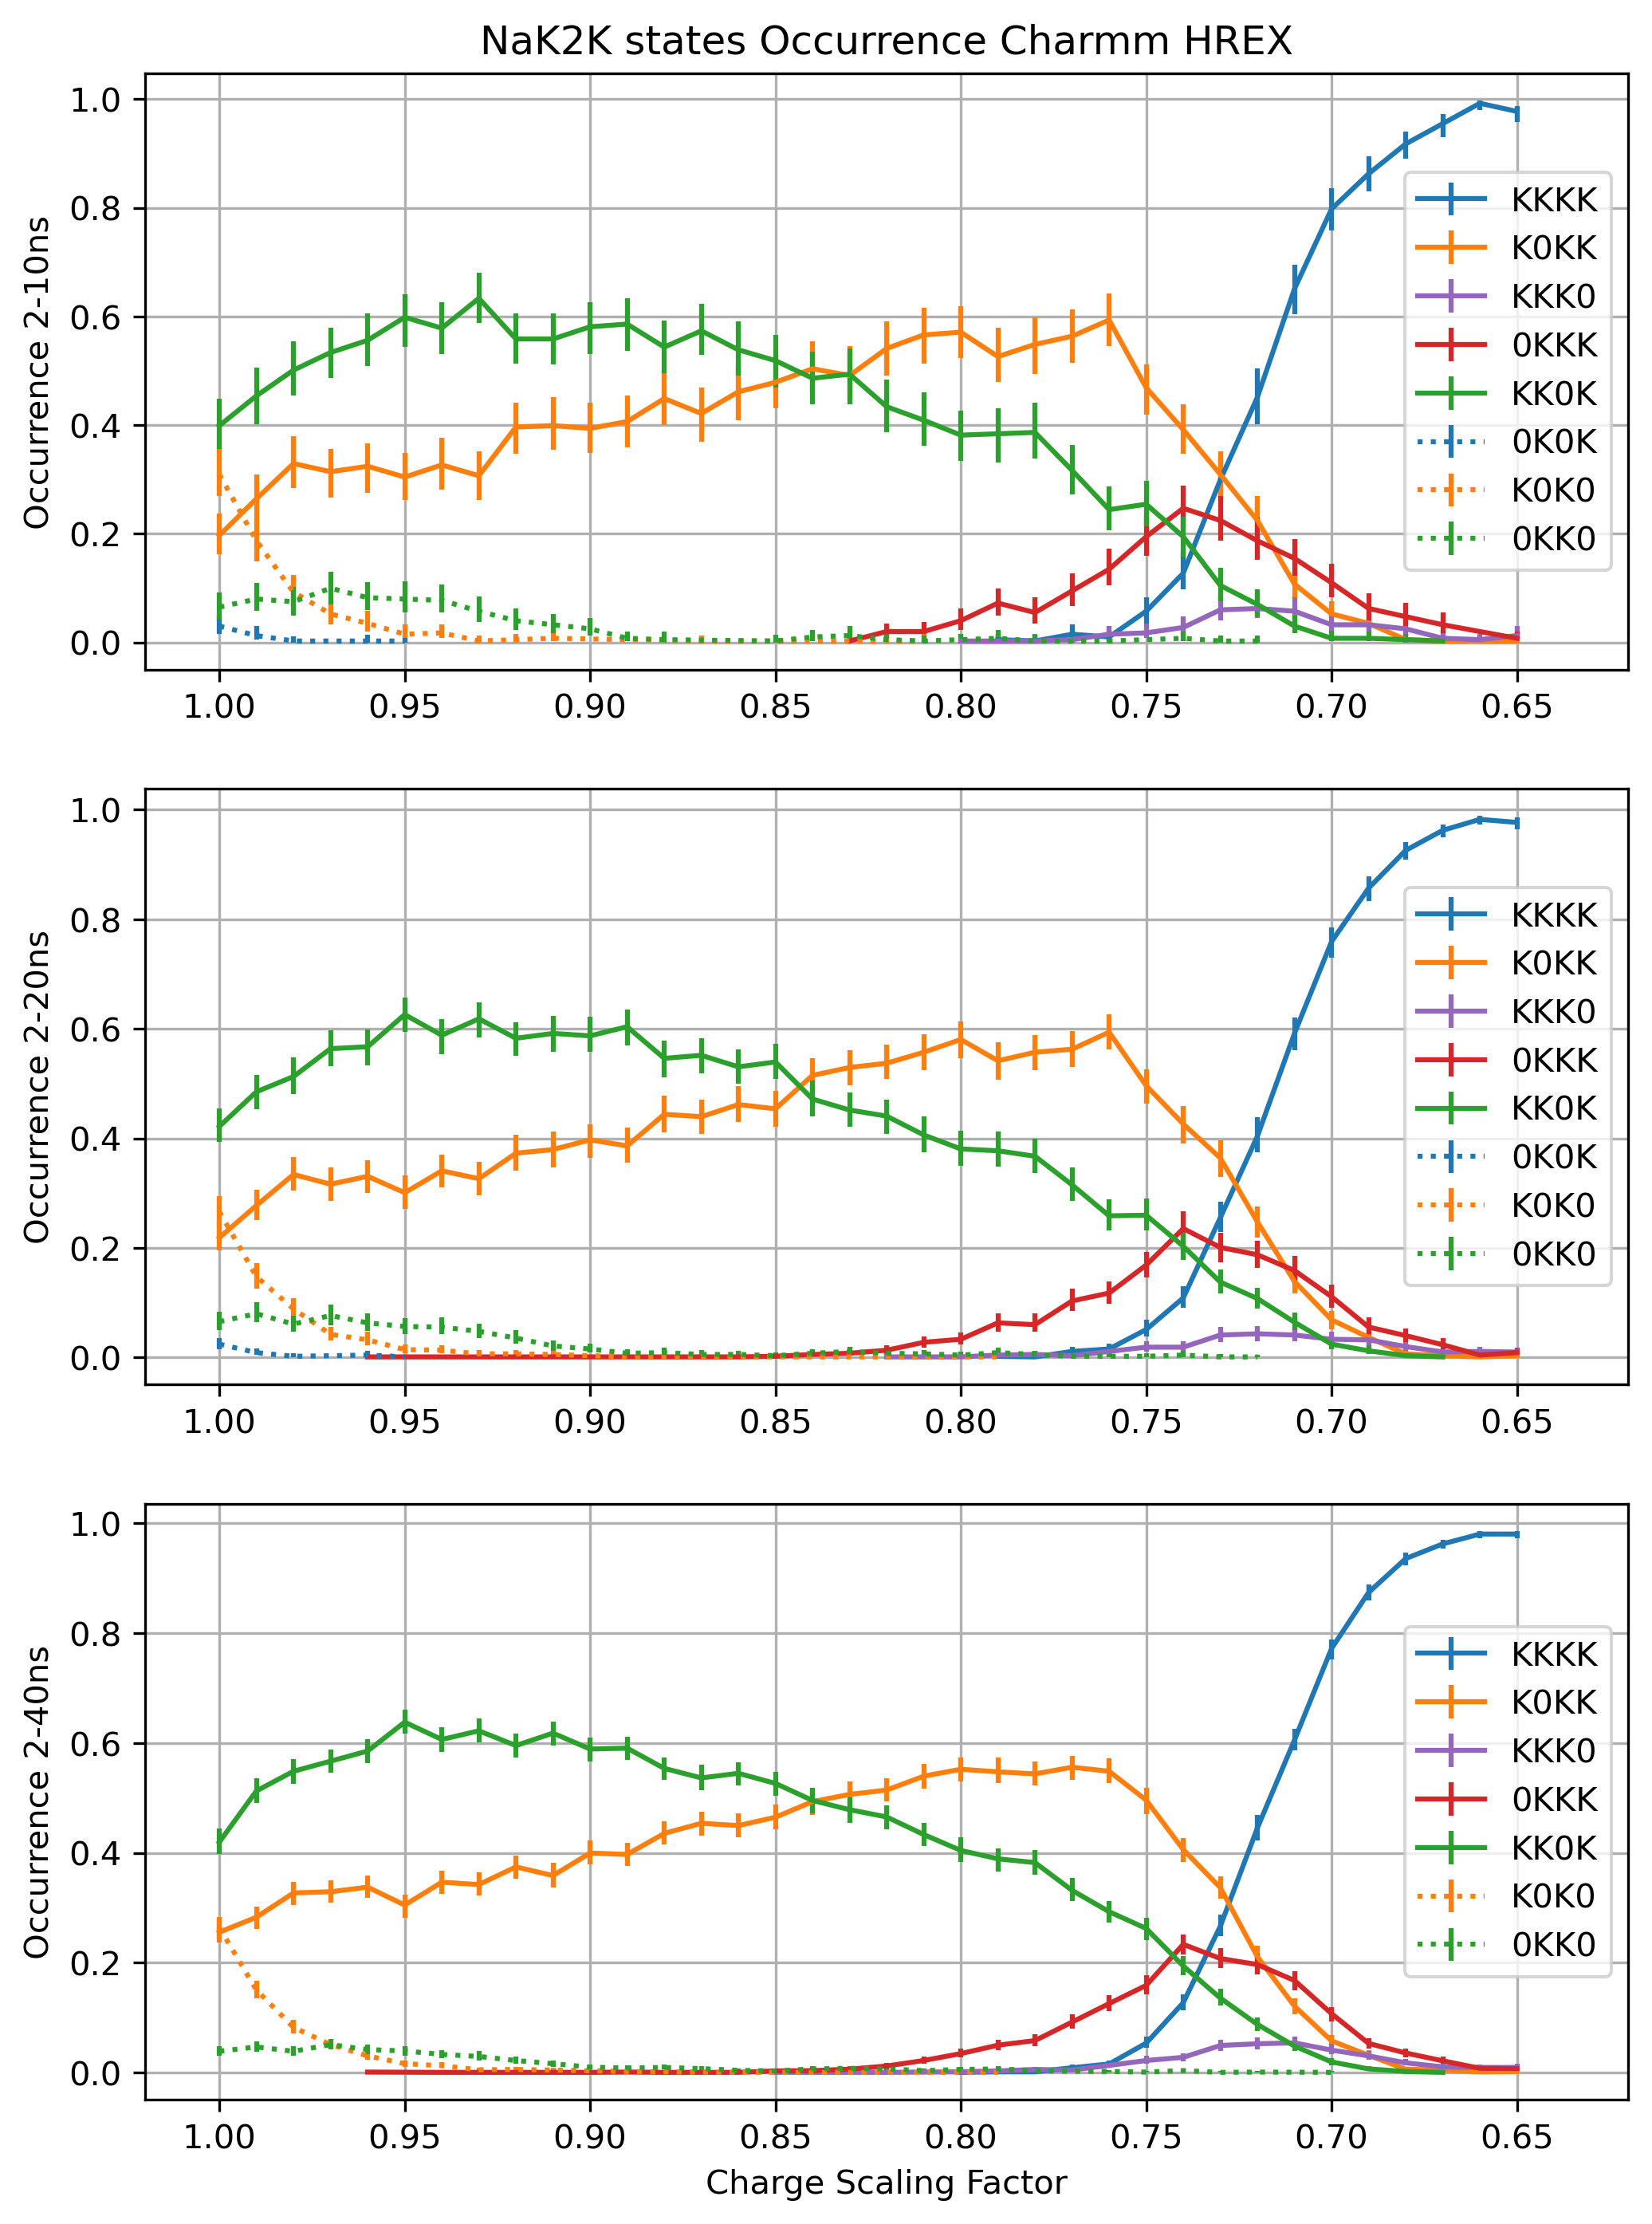

In [63]:
x_axis = np.linspace(1,0.65,36)
(states_result_dict_10, states_result_dict_20, states_result_dict_40) = states_result_NaK2K

plt.figure(3, dpi=300, figsize=(8,11))

plt.subplot(3,1,1)
states_result_dict = states_result_dict_10
plot_state_HREX(x_axis, states_result_dict, state_color_line)
plt.title("NaK2K states Occurrence Charmm HREX")
plt.ylabel("Occurrence 2-10ns")

plt.subplot(3,1,2)
states_result_dict = states_result_dict_20
plot_state_HREX(x_axis, states_result_dict, state_color_line)
plt.ylabel("Occurrence 2-20ns")

plt.subplot(3,1,3)
states_result_dict = states_result_dict_40
plot_state_HREX(x_axis, states_result_dict, state_color_line)
plt.ylabel("Occurrence 2-40ns")
plt.xlabel("Charge Scaling Factor")
plt.savefig("NaK2K_state_Occurrence.png")

## TRAAK SF states Occurrence

In [12]:
file_list = ["../test/02-TRAAK-charge/%d/k_hybrid.out"%i for i in range(36)]

HREX = HREX_result_hybrid(file_list, start=2000, end=10000) # drop 2ns
states_result_dict_10 = HREX.get_state_distribution_bootstrap_frame(4)

HREX = HREX_result_hybrid(file_list, start=2000, end=20000) # drop 2ns
states_result_dict_20 = HREX.get_state_distribution_bootstrap_frame(4)

HREX = HREX_result_hybrid(file_list, start=2000, end=40000.1) # drop 2ns
states_result_dict_40 = HREX.get_state_distribution_bootstrap_frame(4)
states_result_TRAAK = (states_result_dict_10, 
                       states_result_dict_20, 
                       states_result_dict_40)

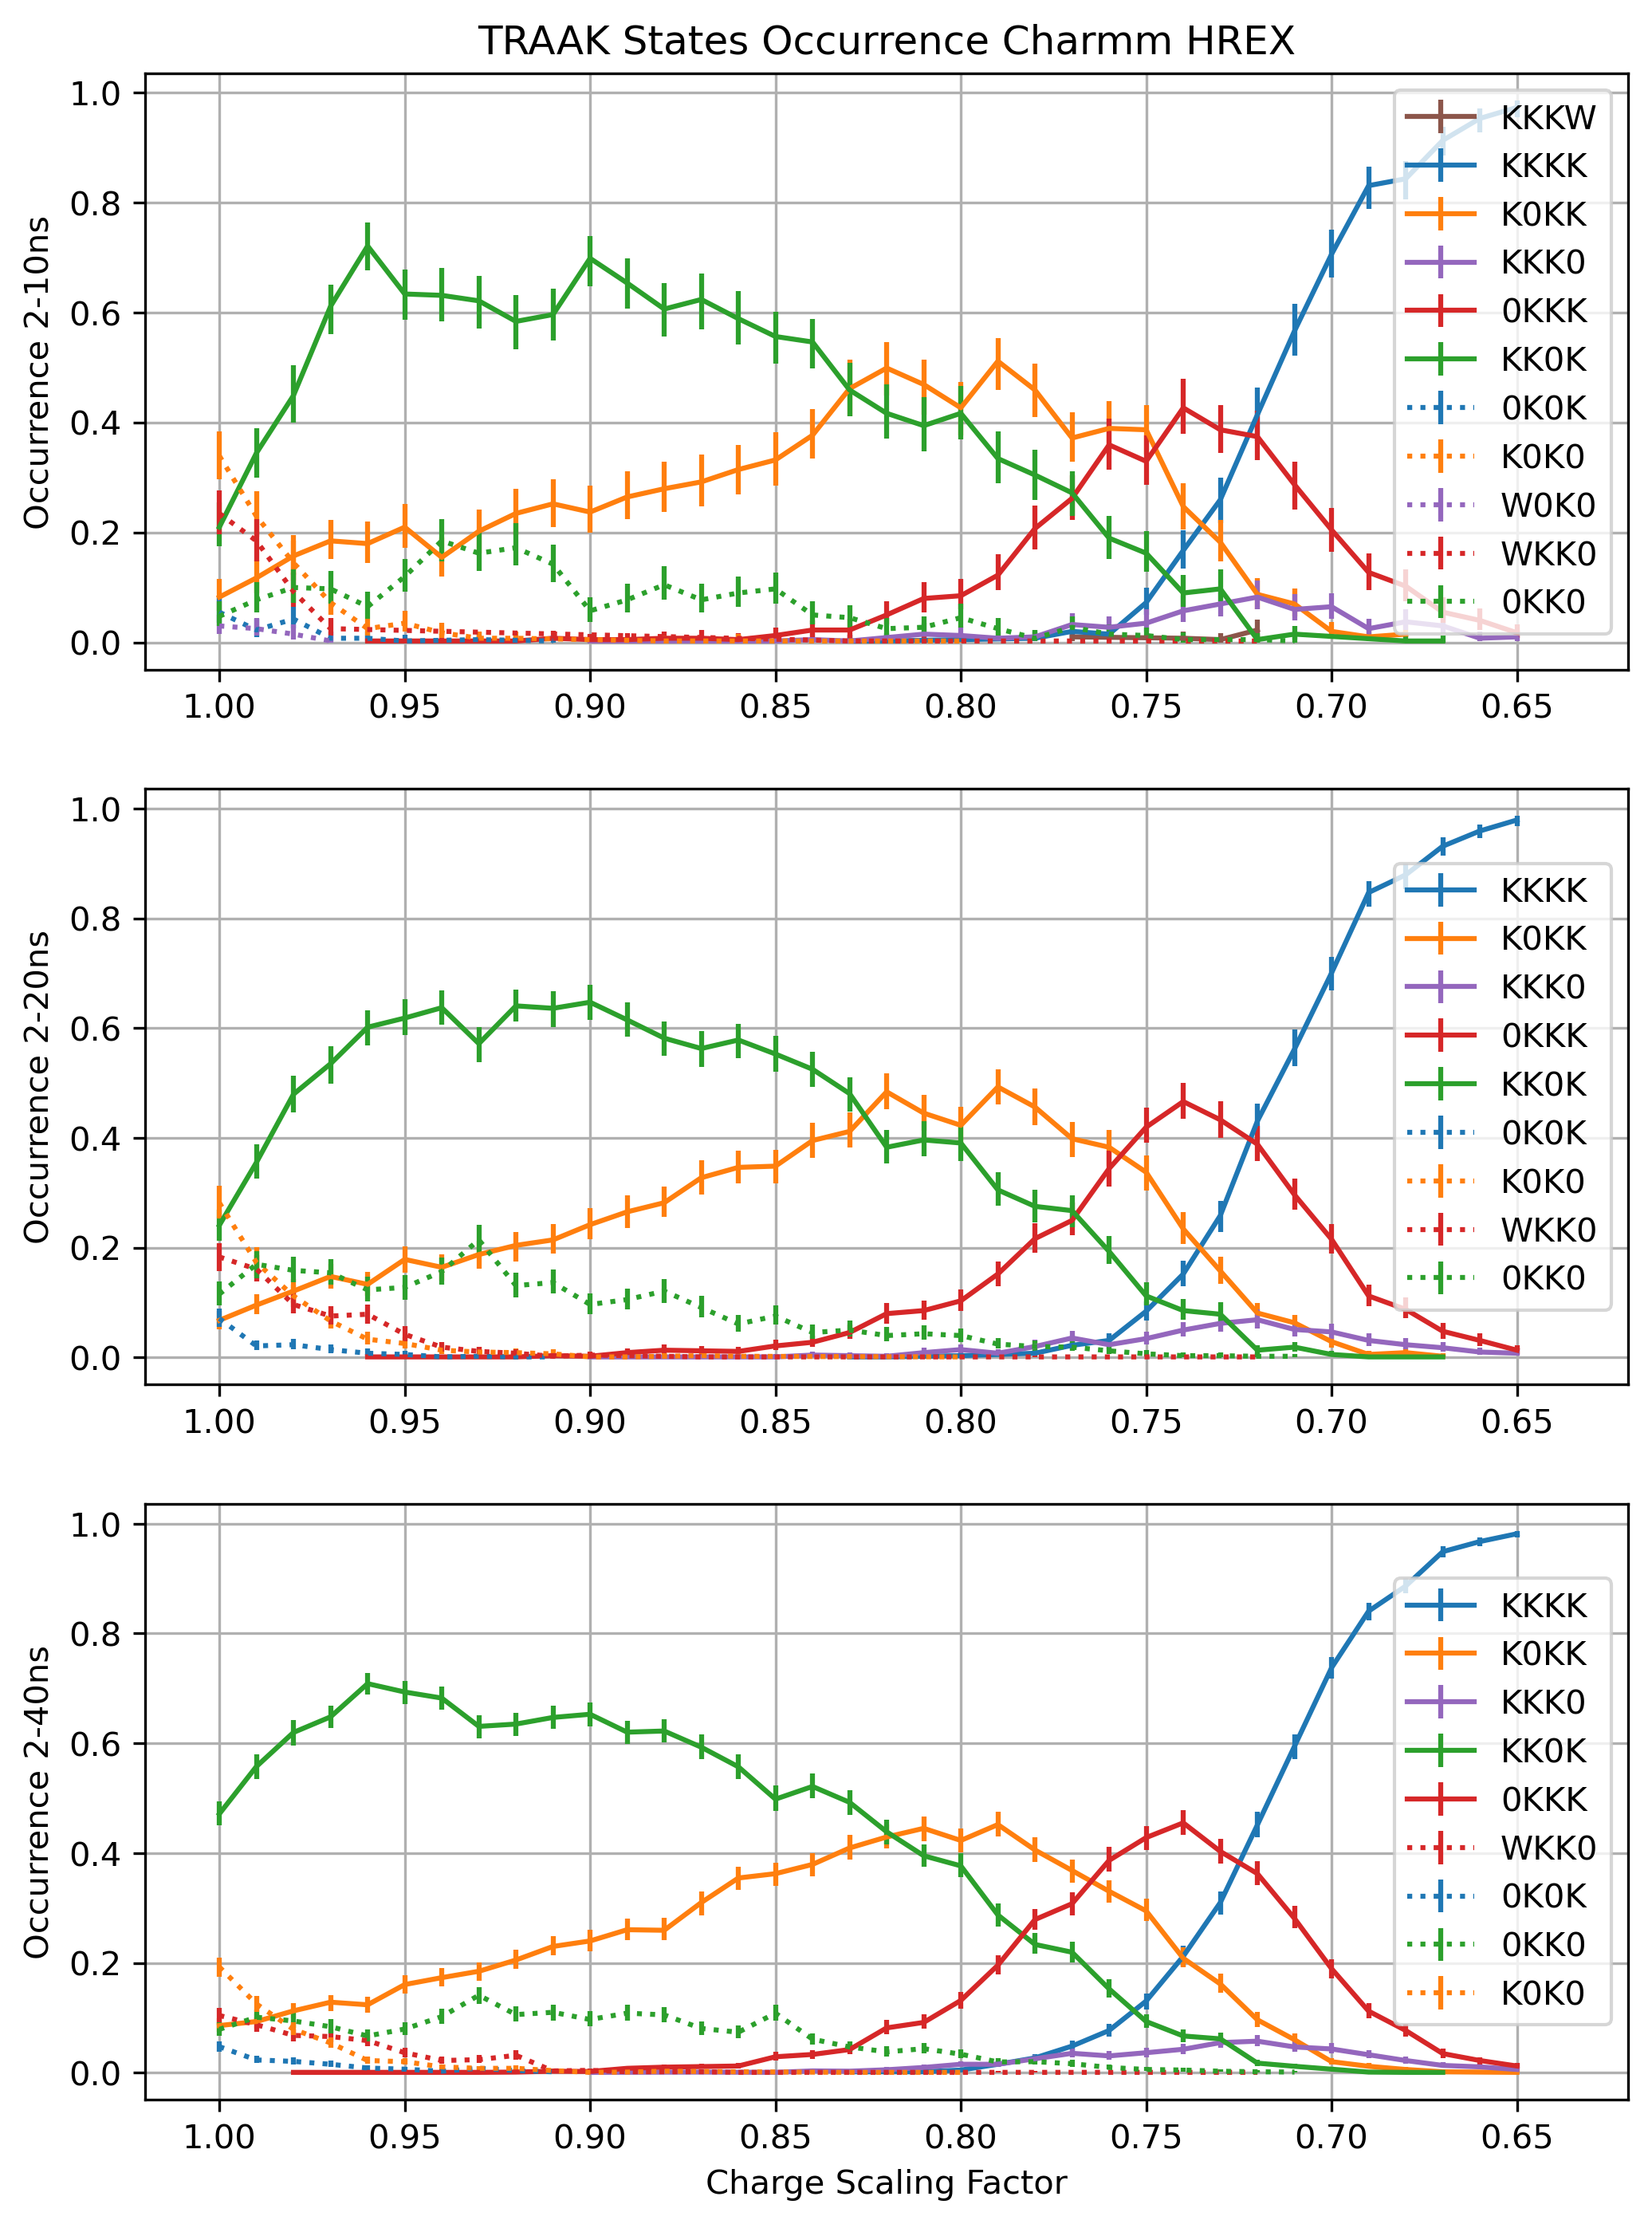

In [64]:
x_axis = np.linspace(1,0.65,36)
(states_result_dict_10, states_result_dict_20, states_result_dict_40) = states_result_TRAAK



plt.figure(3, dpi=300, figsize=(8,11))

plt.subplot(3,1,1)
states_result_dict = states_result_dict_10
plot_state_HREX(x_axis, states_result_dict, state_color_line)
plt.title("TRAAK States Occurrence Charmm HREX")
plt.ylabel("Occurrence 2-10ns")

plt.subplot(3,1,2)
states_result_dict = states_result_dict_20
plot_state_HREX(x_axis, states_result_dict, state_color_line)
plt.ylabel("Occurrence 2-20ns")

plt.subplot(3,1,3)
states_result_dict = states_result_dict_40
plot_state_HREX(x_axis, states_result_dict, state_color_line)
plt.ylabel("Occurrence 2-40ns")
plt.xlabel("Charge Scaling Factor")
plt.savefig("TRAAK_state_Occurrence.png")